In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("Company_Data.csv")
df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df = pd.get_dummies(df,columns=['Urban','US'],drop_first=True)

In [9]:
df['ShelveLoc'] = df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [11]:
df.rename(columns={'Urban_Yes':'Urban','US_Yes':'US'},inplace=True)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [12]:
x = df.iloc[:,[i for i in range(0,6)]+[i for i in range(7,11)]]
y = df['ShelveLoc']

In [13]:
x.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0


In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
# Building Descision Tree Classifier using Entropy Criteria
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [22]:
ypred

array([2, 2, 3, 2, 3, 1, 2, 2, 2, 1, 2, 3, 3, 1, 2, 2, 1, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1, 2, 3, 3, 1,
       3, 3, 2, 3, 2, 2, 2, 3, 3, 1, 2, 1, 1, 2, 1, 1, 3, 2, 3, 3, 2, 2,
       1, 2, 2, 3, 1, 2, 1, 3, 2, 3, 2, 2, 2, 3], dtype=int64)

In [24]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.72      0.65      0.68        20
           2       0.67      0.67      0.67        42
           3       0.45      0.50      0.47        18

    accuracy                           0.62        80
   macro avg       0.61      0.61      0.61        80
weighted avg       0.63      0.62      0.63        80



In [25]:
print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

1.0


0.625

In [26]:
# Hyperparameter Tunning
DecisionTreeClassifier()

DecisionTreeClassifier()

In [28]:
params = {
    'criterion': ['entropy'],
    'splitter' : ["best", "random"],
    'max_depth' : [1,2,3,4,5,6,7]
}

In [29]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params)

In [30]:
grid.fit(xtrain,ytrain)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}

In [31]:
# Building Generalized model
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter='best')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [32]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       0.79      0.55      0.65        20
           2       0.67      0.86      0.75        42
           3       0.67      0.44      0.53        18

    accuracy                           0.69        80
   macro avg       0.71      0.62      0.64        80
weighted avg       0.70      0.69      0.68        80



In [33]:
print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

0.68125


0.6875

In [34]:
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['figure.dpi'] = 250
plt.show()

[Text(0.5, 0.875, 'Sales <= 6.175\nentropy = 1.436\nsamples = 320\nvalue = [65, 177, 78]'),
 Text(0.25, 0.625, 'Income <= 57.5\nentropy = 1.062\nsamples = 112\nvalue = [1, 59, 52]'),
 Text(0.125, 0.375, 'Price <= 100.5\nentropy = 0.859\nsamples = 46\nvalue = [0, 33, 13]'),
 Text(0.0625, 0.125, 'entropy = 0.65\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.1875, 0.125, 'entropy = 0.722\nsamples = 40\nvalue = [0, 32, 8]'),
 Text(0.375, 0.375, 'Age <= 78.5\nentropy = 1.07\nsamples = 66\nvalue = [1, 26, 39]'),
 Text(0.3125, 0.125, 'entropy = 0.943\nsamples = 61\nvalue = [0, 22, 39]'),
 Text(0.4375, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(0.75, 0.625, 'Sales <= 10.49\nentropy = 1.362\nsamples = 208\nvalue = [64, 118, 26]'),
 Text(0.625, 0.375, 'Price <= 107.5\nentropy = 1.261\nsamples = 161\nvalue = [32, 106, 23]'),
 Text(0.5625, 0.125, 'entropy = 1.038\nsamples = 62\nvalue = [2, 43, 17]'),
 Text(0.6875, 0.125, 'entropy = 1.182\nsamples = 99\nvalue = [30, 63, 6]'),
 Tex

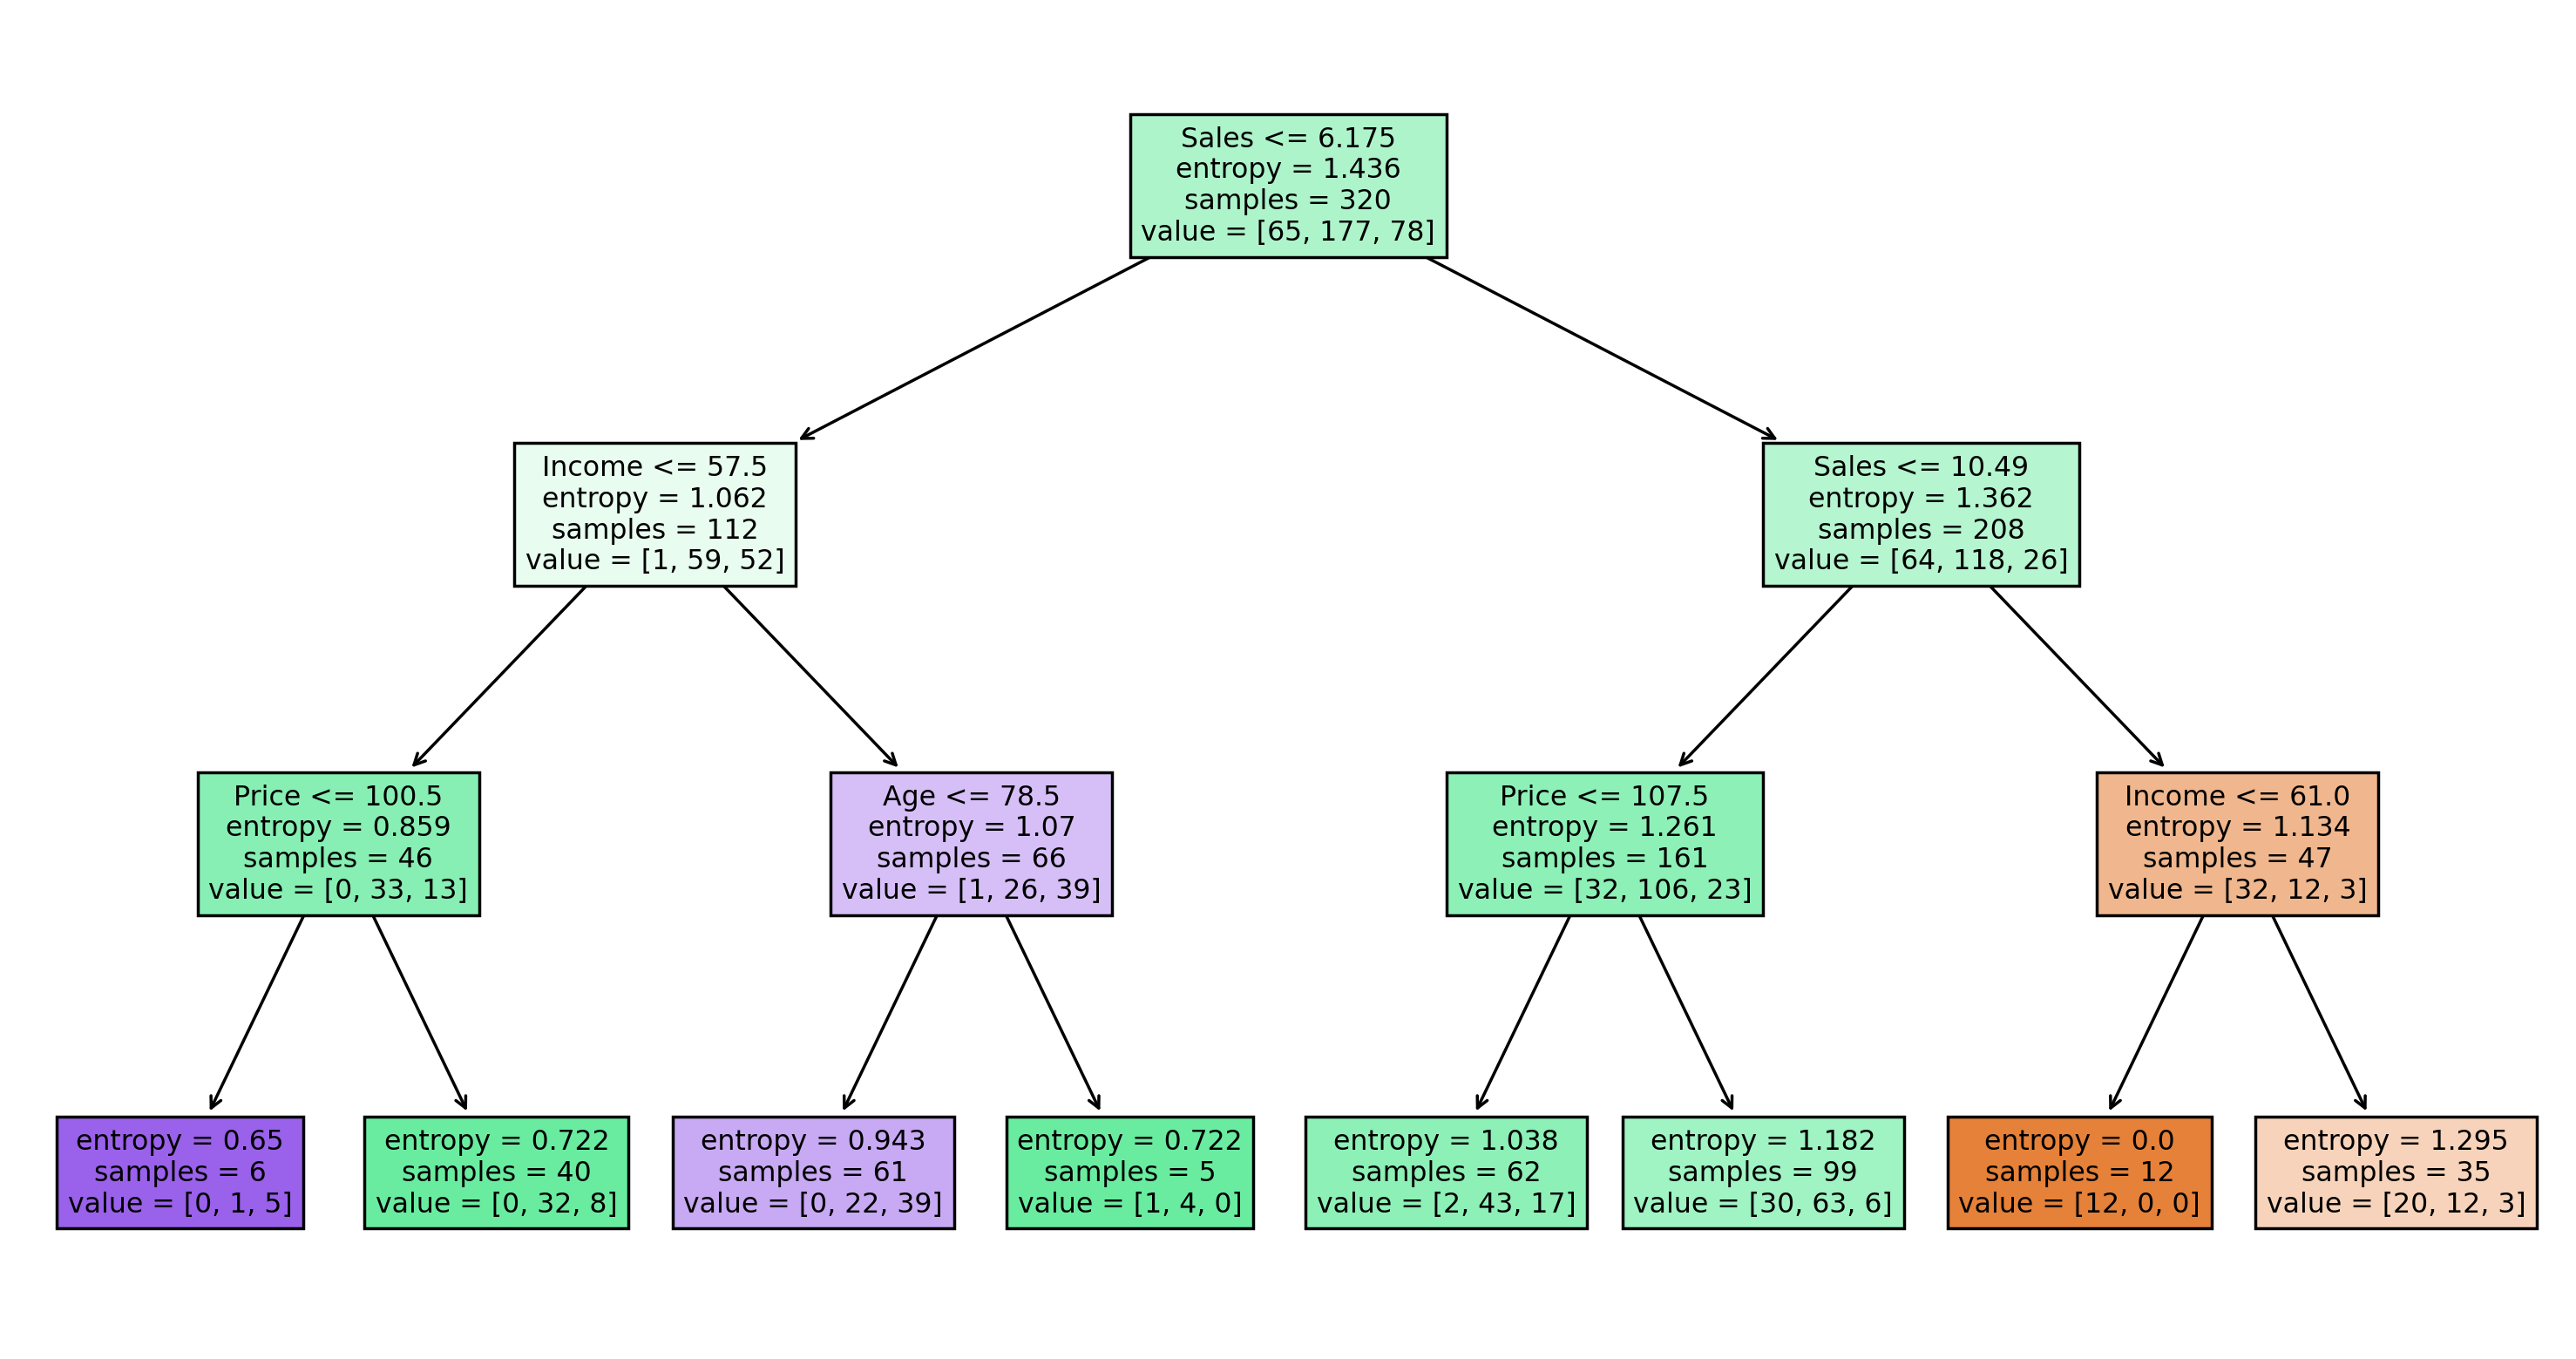

In [35]:
tree.plot_tree(dt,feature_names=x.columns,filled=True)

In [36]:
#Cart Approach
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


In [37]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [39]:
# Building Decision tree Classifier using Gini criteria
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([2, 2, 3, 2, 2, 1, 3, 1, 1, 2, 1, 3, 3, 1, 2, 3, 1, 2, 1, 1, 1, 3,
       3, 2, 2, 2, 2, 1, 3, 3, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 1, 1, 2, 1, 1, 3, 2, 3, 3, 3, 3,
       1, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3], dtype=int64)

In [40]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.61      0.55      0.58        20
           2       0.59      0.52      0.56        42
           3       0.48      0.67      0.56        18

    accuracy                           0.56        80
   macro avg       0.56      0.58      0.56        80
weighted avg       0.57      0.56      0.56        80



In [41]:
print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

1.0


0.5625

In [42]:
# HyperParameter Tuning
DecisionTreeClassifier()

DecisionTreeClassifier()

In [43]:
params = {
    'criterion' : ['gini'],
    'splitter' : ["best", "random"],
    'max_depth' : [1,2,3,4,5,6,7,8,9]
}

In [44]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params)

In [45]:
grid.fit(xtrain,ytrain)
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}

In [47]:
# Generalized model
dt = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=2)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([2, 2, 2, 2, 3, 1, 2, 1, 1, 2, 1, 2, 3, 1, 2, 2, 1, 2, 2, 2, 2, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 1, 1, 2, 1, 1, 3, 2, 3, 3, 3, 3,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2], dtype=int64)

In [48]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.77      0.50      0.61        20
           2       0.64      0.76      0.70        42
           3       0.53      0.50      0.51        18

    accuracy                           0.64        80
   macro avg       0.65      0.59      0.61        80
weighted avg       0.65      0.64      0.63        80



In [49]:
print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

0.653125


0.6375

[Text(0.5, 0.8333333333333334, 'Sales <= 10.49\ngini = 0.593\nsamples = 320\nvalue = [65, 177, 78]'),
 Text(0.25, 0.5, 'Sales <= 5.29\ngini = 0.545\nsamples = 273\nvalue = [33, 165, 75]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.506\nsamples = 74\nvalue = [1, 32, 41]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.498\nsamples = 199\nvalue = [32, 133, 34]'),
 Text(0.75, 0.5, 'CompPrice <= 103.5\ngini = 0.467\nsamples = 47\nvalue = [32, 12, 3]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.414\nsamples = 42\nvalue = [31, 8, 3]')]

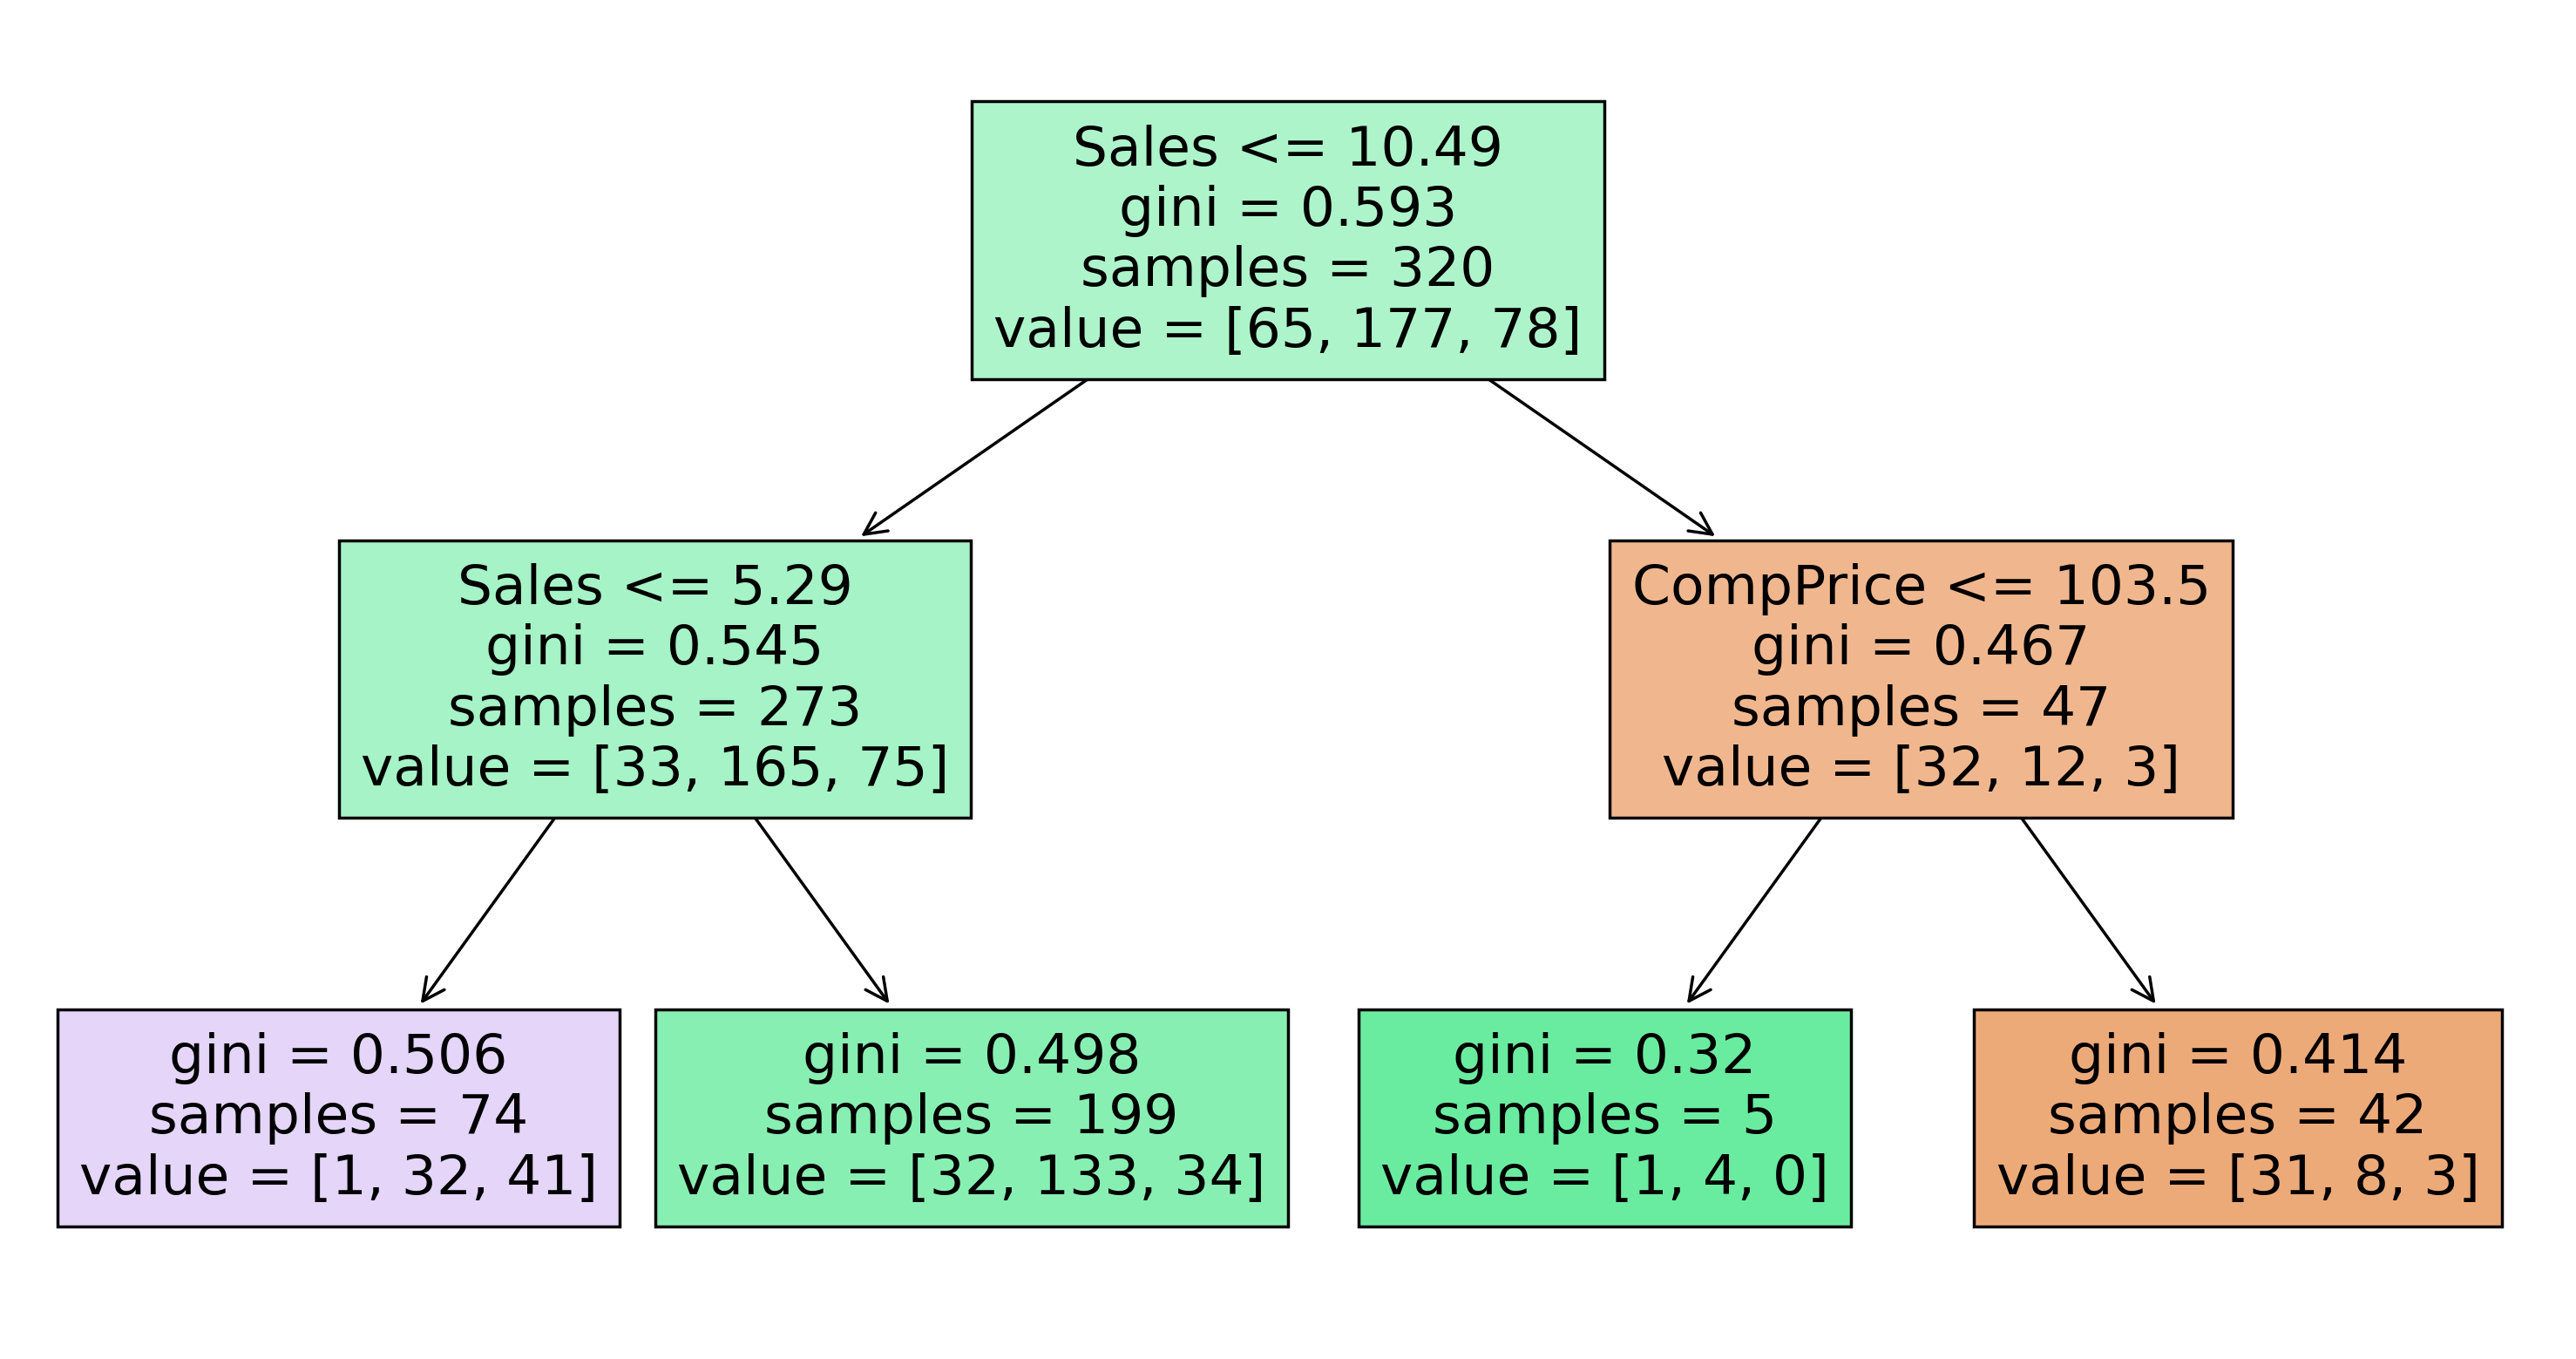

In [51]:
tree.plot_tree(dt,feature_names=x.columns,filled=True)